<a href="https://colab.research.google.com/github/LNshuti/umuturanyi/blob/main/kora_database_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker --quiet

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Number of records
n_users = 1000
n_suppliers = 50
n_products = 200
n_stores = 50
n_orders = 1000
n_order_items = 3000
n_inventory_records = 500
n_payments = 1000

# Helper functions
def random_price():
    return round(random.uniform(10, 500), 2)

# Users Data
users = pd.DataFrame({
    'UserId': range(1, n_users + 1),
    'Name': [fake.name() for _ in range(n_users)],
    'Email': [fake.email() for _ in range(n_users)],
    'PasswordHash': [fake.sha256() for _ in range(n_users)],
    'PhoneNumber': [fake.phone_number() for _ in range(n_users)],
    'Role': [random.choice(['Admin', 'Store Manager', 'Customer']) for _ in range(n_users)],
    'CreatedAt': [fake.date_time_this_decade() for _ in range(n_users)]
})

# Suppliers Data
suppliers = pd.DataFrame({
    'SupplierId': range(1, n_suppliers + 1),
    'Name': [fake.company() for _ in range(n_suppliers)],
    'ContactName': [fake.name() for _ in range(n_suppliers)],
    'Phone': [fake.phone_number() for _ in range(n_suppliers)],
    'Email': [fake.company_email() for _ in range(n_suppliers)],
    'Address': [fake.address() for _ in range(n_suppliers)]
})

# Products Data
products = pd.DataFrame({
    'ProductId': range(1, n_products + 1),
    'Name': [fake.word() for _ in range(n_products)],
    'Description': [fake.sentence() for _ in range(n_products)],
    'Category': [random.choice(['Engine', 'Tires', 'Brakes', 'Filters', 'Oil & Fluids']) for _ in range(n_products)],
    'Price': [random_price() for _ in range(n_products)],
    'StockQuantity': [random.randint(0, 500) for _ in range(n_products)],
    'SupplierId': [random.choice(range(1, n_suppliers + 1)) for _ in range(n_products)],
    'CreatedAt': [fake.date_time_this_decade() for _ in range(n_products)]
})


In [ ]:
products.head()

,ProductId,Name,Description,Category,Price,StockQuantity,SupplierId,CreatedAt
0,1,her,Head majority project.,Oil & Fluids,53.14,292,50,2022-07-30 18:35:09.500777
1,2,voice,Small next mention find.,Tires,443.89,148,34,2021-03-13 03:12:04.254775
2,3,government,Up political out laugh raise.,Oil & Fluids,280.74,137,50,2023-10-27 05:54:18.280703
3,4,home,Whatever network even material seem.,Oil & Fluids,84.61,273,1,2022-09-05 02:30:30.412779
4,5,people,Become think open consider.,Oil & Fluids,480.90,34,50,2020-07-29 21:40:01.642095


In [ ]:
suppliers.head()

,SupplierId,Name,ContactName,Phone,Email,Address
0,1,Barber Group,Joseph Hays,4819128149,randall16@miller.net,"1257 Christina Fields\nEast David, OK 61257"
1,2,Cummings-Cain,Joseph Lewis,332-530-2456,susan29@guerrero.com,"063 Duffy Circles Apt. 384\nNancyborough, MP 8..."
2,3,"Le, Maldonado and Myers",Christopher Wood,(657)545-8815x491,meyerskellie@wood-obrien.com,"6262 Reynolds Fields\nSouth Michelleton, AL 53272"
3,4,Olson-Brady,Bryan Mcneil,422-270-3214x7719,frankmoore@weaver.info,"91651 Weaver Crescent\nCaitlinside, MN 98093"
4,5,"Wilson, Watson and Duncan",Michelle Wilson,(704)242-3585,kellylopez@harris.com,"1703 Anthony Square\nMargaretbury, TN 43272"


In [ ]:
users.head()

,UserId,Name,Email,PasswordHash,PhoneNumber,Role,CreatedAt
0,1,Matthew Chen,richardlee@example.com,b423d89cc0e40b041686c6225207e962d48f3cadb94d3b...,001-401-634-3854x244,Store Manager,2022-12-31 15:20:02.070235
1,2,Ashley Barrera,maureengregory@example.org,ee130b70d113cfdaf816356381e7d705990fc72c7072af...,5184338278,Store Manager,2021-10-26 15:33:14.375437
2,3,Matthew Brown,judy94@example.com,2c543285a887d1f957043052924288d0ec5c564eef7947...,+1-522-909-8456x6415,Store Manager,2020-01-14 20:50:47.913912
3,4,Randy Oconnell,morgankerry@example.org,5af1079796cde62edf140c9640c8a2318720d40684bea0...,273-202-0286,Admin,2020-01-14 10:29:29.036700
4,5,James Cooper,michael06@example.org,8cd91fa0e6aaa87fe401453ea571cbeb6c3a48da6b07fa...,(514)403-8570,Store Manager,2021-01-19 20:53:22.375424


In [ ]:
# Orders Data
orders = pd.DataFrame({
    'OrderId': range(1, n_orders + 1),
    'UserId': [random.choice(users['UserId']) for _ in range(n_orders)],
    'TotalAmount': [random_price() * random.randint(1, 5) for _ in range(n_orders)],
    'Status': [random.choice(['Pending', 'Shipped', 'Delivered', 'Cancelled']) for _ in range(n_orders)],
    'CreatedAt': [fake.date_time_this_year() for _ in range(n_orders)]
})

# OrderItems Data
order_items = pd.DataFrame({
    'OrderItemId': range(1, n_order_items + 1),
    'OrderId': [random.choice(orders['OrderId']) for _ in range(n_order_items)],
    'ProductId': [random.choice(products['ProductId']) for _ in range(n_order_items)],
    'Quantity': [random.randint(1, 10) for _ in range(n_order_items)],
    'UnitPrice': [random_price() for _ in range(n_order_items)]
})
orders

,OrderId,UserId,TotalAmount,Status,CreatedAt
0,1,261,436.00,Pending,2024-05-21 22:14:04.805541
1,2,437,854.20,Shipped,2024-07-27 22:30:44.042048
2,3,331,299.46,Delivered,2024-09-23 22:12:14.390240
3,4,894,392.43,Pending,2024-04-05 11:46:21.819206
4,5,553,128.64,Delivered,2024-08-31 22:08:07.276067
...,...,...,...,...,...
995,996,509,870.40,Delivered,2024-03-24 16:09:35.965489
996,997,220,202.95,Delivered,2024-09-14 22:15:16.820669
997,998,880,564.44,Shipped,2024-07-22 09:36:38.283224
998,999,87,180.76,Pending,2024-08-20 19:53:42.766405


In [ ]:
order_items

,OrderItemId,OrderId,ProductId,Quantity,UnitPrice
0,1,347,124,3,365.16
1,2,992,165,1,280.10
2,3,461,26,1,363.64
3,4,6,113,10,481.75
4,5,540,56,10,46.58
...,...,...,...,...,...
2995,2996,110,17,6,190.50
2996,2997,787,22,5,53.77
2997,2998,49,30,4,124.45
2998,2999,477,125,3,59.30


In [ ]:
# Saving to CSVs
users.to_csv('users.csv', index=False)
suppliers.to_csv('suppliers.csv', index=False)
products.to_csv('/products.csv', index=False)
#stores.to_csv('/stores.csv', index=False)
orders.to_csv('/orders.csv', index=False)
order_items.to_csv('/order_items.csv', index=False)
#inventory.to_csv('/inventory.csv', index=False)
#payments.to_csv('/payments.csv', index=False)


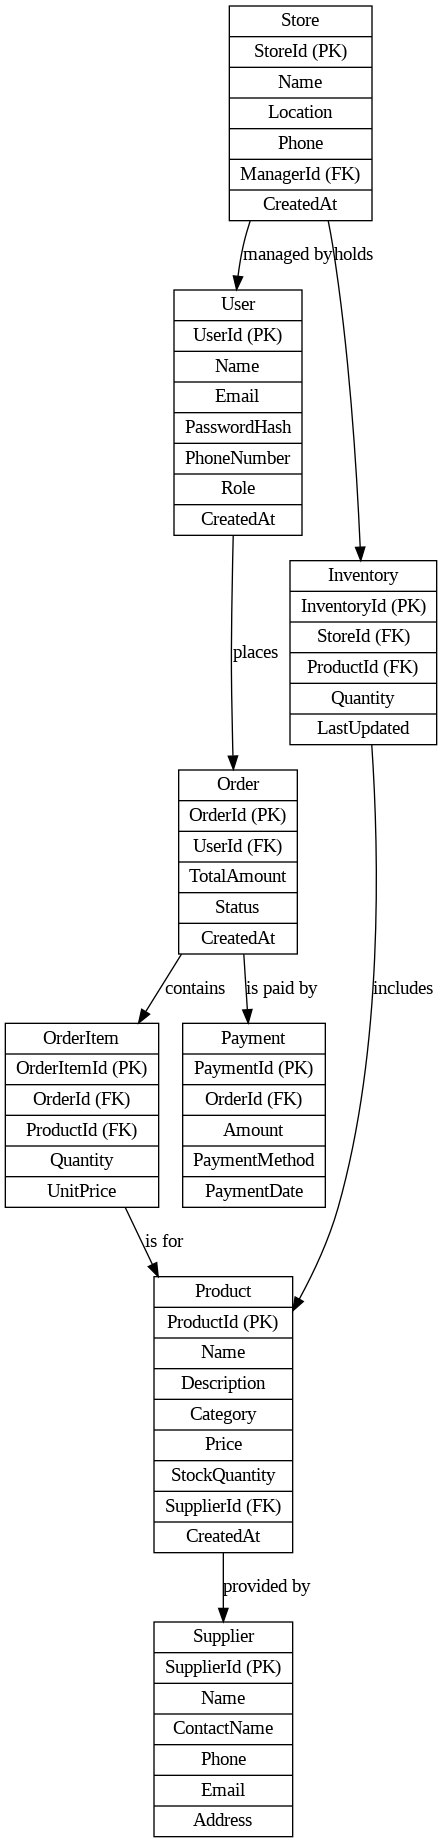

In [ ]:
# Simplifying the labels to avoid formatting issues
import pydot
from IPython.display import Image, display

# Define the nodes for each entity with simplified labels
user = pydot.Node("User", shape="record", label="{User|UserId (PK)|Name|Email|PasswordHash|PhoneNumber|Role|CreatedAt}")

product = pydot.Node("Product", shape="record", label="{Product|ProductId (PK)|Name|Description|Category|Price|StockQuantity|SupplierId (FK)|CreatedAt}")

order = pydot.Node("Order", shape="record", label="{Order|OrderId (PK)|UserId (FK)|TotalAmount|Status|CreatedAt}")

order_item = pydot.Node("OrderItem", shape="record", label="{OrderItem|OrderItemId (PK)|OrderId (FK)|ProductId (FK)|Quantity|UnitPrice}")

store = pydot.Node("Store", shape="record", label="{Store|StoreId (PK)|Name|Location|Phone|ManagerId (FK)|CreatedAt}")

inventory = pydot.Node("Inventory", shape="record", label="{Inventory|InventoryId (PK)|StoreId (FK)|ProductId (FK)|Quantity|LastUpdated}")

payment = pydot.Node("Payment", shape="record", label="{Payment|PaymentId (PK)|OrderId (FK)|Amount|PaymentMethod|PaymentDate}")

supplier = pydot.Node("Supplier", shape="record", label="{Supplier|SupplierId (PK)|Name|ContactName|Phone|Email|Address}")

# Create a graph and add nodes
graph = pydot.Dot(graph_type="digraph", rankdir="TB")
graph.add_node(user)
graph.add_node(product)
graph.add_node(order)
graph.add_node(order_item)
graph.add_node(store)
graph.add_node(inventory)
graph.add_node(payment)
graph.add_node(supplier)

# Define the relationships (edges) between entities
graph.add_edge(pydot.Edge("User", "Order", label="places"))
graph.add_edge(pydot.Edge("Order", "OrderItem", label="contains"))
graph.add_edge(pydot.Edge("OrderItem", "Product", label="is for"))
graph.add_edge(pydot.Edge("Store", "Inventory", label="holds"))
graph.add_edge(pydot.Edge("Inventory", "Product", label="includes"))
graph.add_edge(pydot.Edge("Order", "Payment", label="is paid by"))
graph.add_edge(pydot.Edge("Product", "Supplier", label="provided by"))
graph.add_edge(pydot.Edge("Store", "User", label="managed by"))

# Save the graph to a file
graph.write_png('autozone_database_diagram.png')
display(Image('autozone_database_diagram.png'))


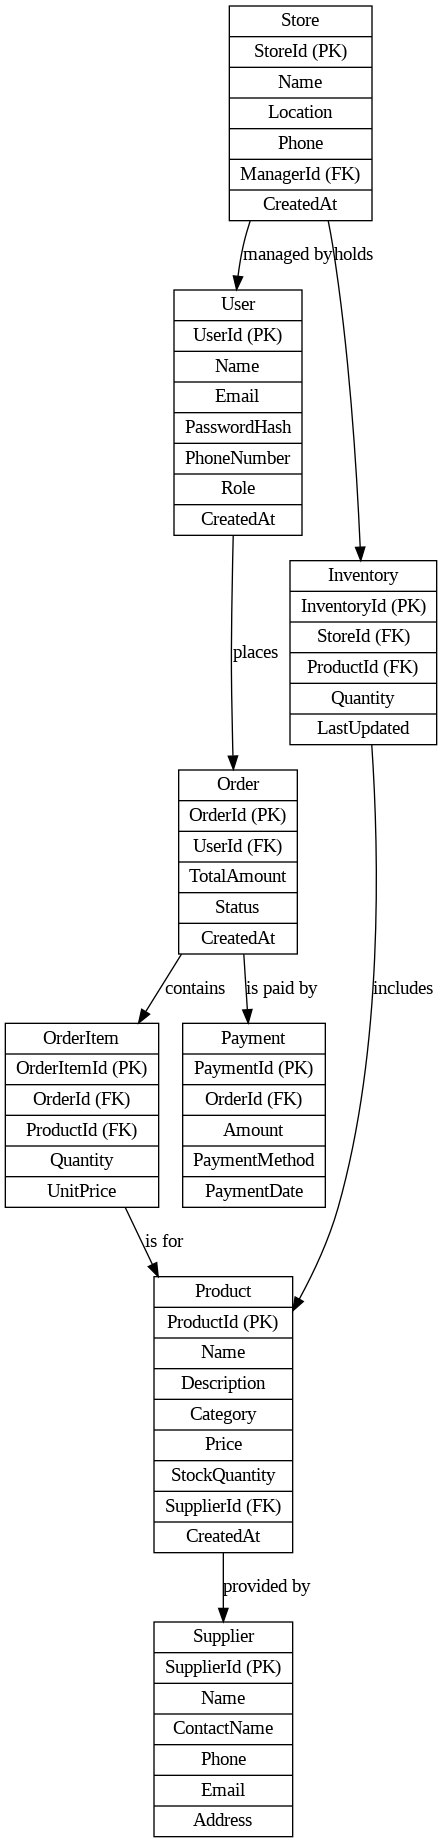

In [ ]:
# Save and display the diagram
#graph.write_png('/mnt/data/autozone_database_diagram.png')
display(Image('autozone_database_diagram.png'))